1) **Data Cleaning**

Choose a dataset and upload it to a Git repository with the following characteristics:

* At least 4 variables in the dataset
* At least 2 numeric values
* At least 1 alphanumeric value
* At least 1 date value
* 1 Dataset preference
* Minimum 5000 rows

In [3]:
import pandas as pd

# Load the dataset
file_path = 'DATASET/car_prices_dataset.csv'  # Update this path if needed
car_data = pd.read_csv(file_path)

# Display the dataset
car_data.head()  # Show the first 5 rows


,Make,Model,Year,Price,Mileage,Manufacture_Date
0,Volkswagen,SUV,2006,8327,113521,2016-12-12
1,Nissan,Hatchback,2019,34768,116378,2007-09-05
2,Hyundai,Sedan,2014,69418,17140,2003-05-11
3,Honda,Minivan,2010,47788,2670,2003-07-08
4,Volkswagen,Coupe,2007,51830,36519,2001-11-20


2) **Descriptive Statistics**

Run descriptive statistics on the data, identifying the entities and relations and drawing its diagram. Additionally, group the data by entities and obtain statistics from the grouped data.

Diagrama


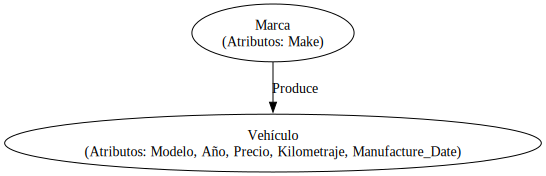

In [27]:
from graphviz import Digraph

# Crear un diagrama de Graphviz
dot = Digraph()

# Definir las entidades
dot.node("Marca", "Marca\n(Atributos: Make)")
dot.node("Vehículo", "Vehículo\n(Atributos: Modelo, Año, Precio, Kilometraje, Manufacture_Date)")

# Definir la relación
dot.edge("Marca", "Vehículo", label="Produce")

# Visualizar el diagrama directamente en el notebook
dot  # Esta línea muestra el diagrama en Jupyter Notebook si lo estás usando



Descriptive statistics

In [29]:
# Agrupar datos por "Marca" y calcular estadísticas agrupadas
grouped_stats_by_make = car_data.groupby("Make").agg({
    "Price": ["mean", "median", "min", "max", "std"],
    "Mileage": ["mean", "median", "min", "max", "std"],
    "Year": ["min", "max", "mean"]
}).reset_index()

# Mostrar estadísticas agrupadas
display(grouped_stats_by_make)


Make         Price                                       
                          mean   median   min    max           std   
0           Audi  41102.219885  42271.0  5368  79711  21393.343504  \
1            BMW  42586.538160  42034.0  5055  79462  21206.811007   
2      Chevrolet  41622.030242  41355.5  5215  79716  20708.268566   
3           Ford  41970.510597  42394.0  5132  79816  22157.136700   
4          Honda  42038.082397  41725.0  5002  79702  21368.102287   
5        Hyundai  41724.892562  40913.0  5148  79960  22771.027264   
6  Mercedes-Benz  42266.688935  42909.0  5336  79921  22086.316813   
7         Nissan  42134.394251  41833.0  5037  79991  21955.171660   
8         Toyota  42130.637624  41901.0  5060  79907  21916.284943   
9     Volkswagen  40897.714286  39488.5  5178  79554  21943.922689   

         Mileage                                       Year                     
            mean    median  min     max           std   min   max         mean  
0   93886.575526   88952.0   15  199803  58157.094881  2000  2022  2010.409178  
1   99787.074364   97274.0  244  199966  59277.293047  2000  2022  2011.248532  
2  100288.040323  104252.0   26  199867  58734.647035  2000  2022  2011.707661  
3   97864.982659   96076.0   36  199041  57540.761607  2000  2022  2011.050096  
4   99136.840824   99289.5  440  199547  55955.284323  2000  2022  2011.065543  
5   96489.873967   95336.5    5  199221  57820.945627  2000  2022  2011.380165  
6   96003.321503   96359.0  296  197494  57383.308418  2000  2022  2011.121086  
7   98665.078029   97095.0  255  199521  57911.980995  2000  2022  2010.979466  
8  102365.415842  102566.0   64  199695  57953.911569  2000  2022  2010.762376  
9   97557.989177   93961.5  569  199689  58570.325819  2000  2022  2010.829004

3) Data Visualization
   Generate graphs and visulizations, pie diagrams, histogram, boxplots, plots and scatter plots, genearate as many as you can using for loops, at least 5 diferent diagrams.

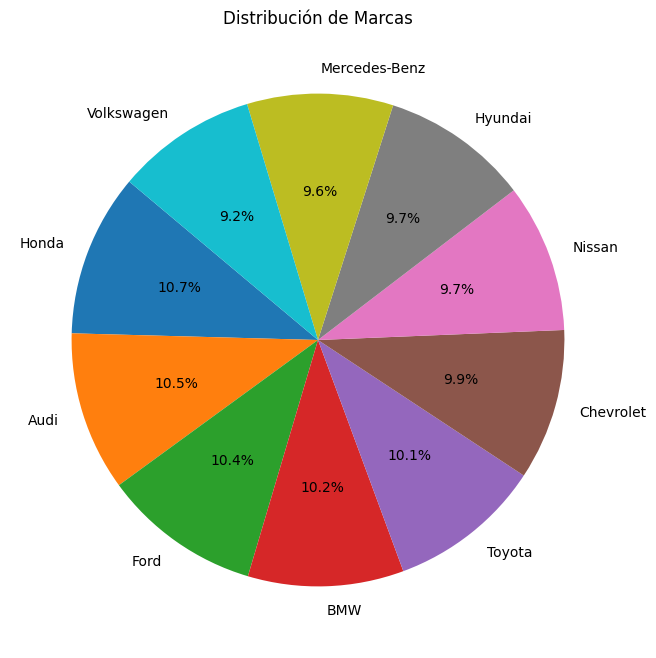

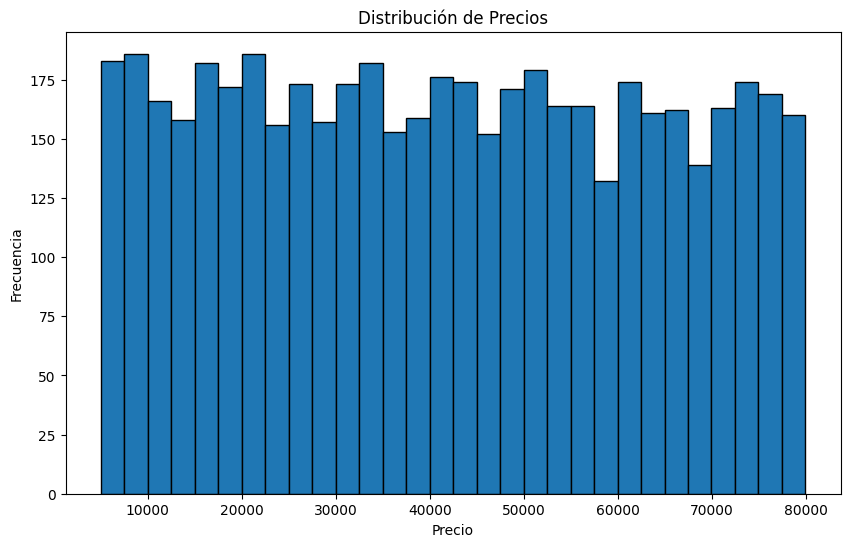

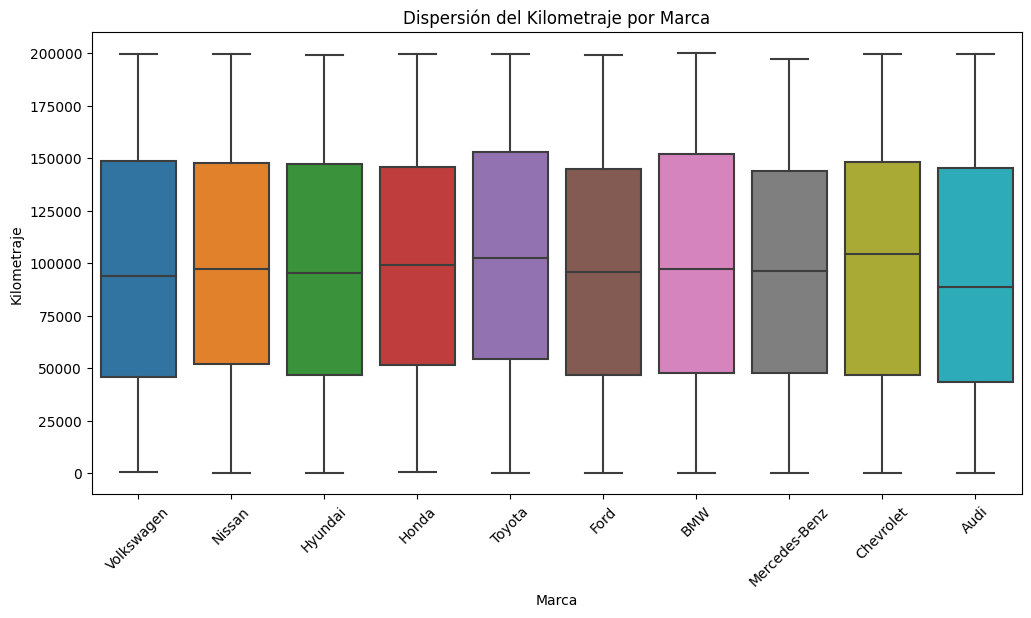

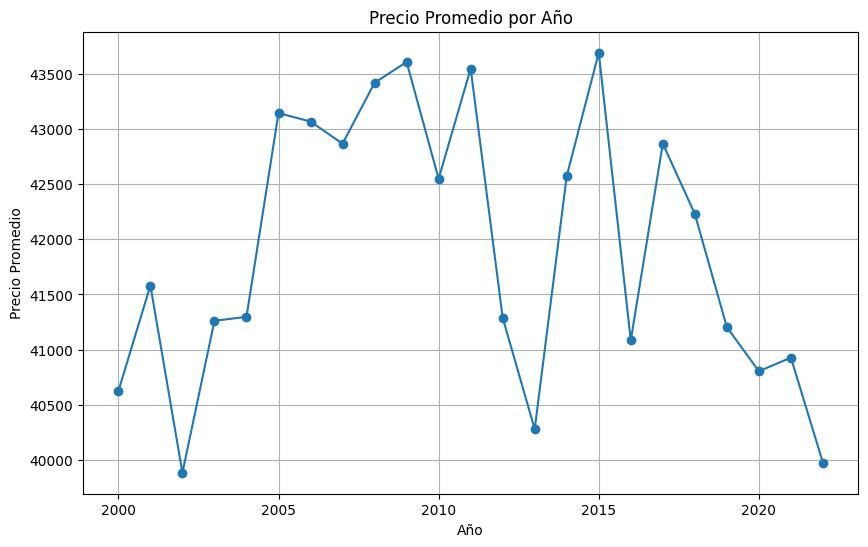

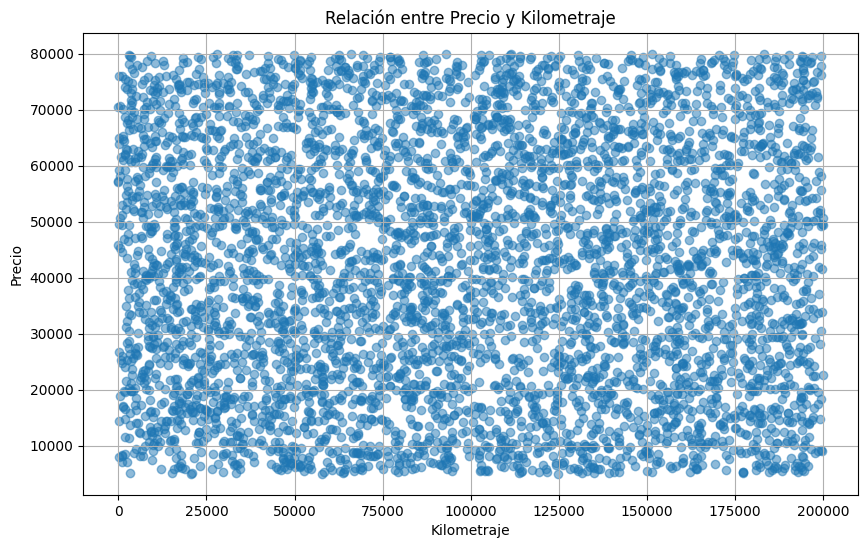

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico de pastel (Pie Chart): Distribución de marcas
brand_distribution = car_data['Make'].value_counts()
plt.figure(figsize=(8, 8))
brand_distribution.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Marcas")
plt.ylabel('')
plt.show()

# 2. Histograma: Distribución de Precios
plt.figure(figsize=(10, 6))
plt.hist(car_data['Price'], bins=30, edgecolor='k')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# 3. Boxplot: Dispersión del Kilometraje por Marca
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_data, x="Make", y="Mileage")
plt.title("Dispersión del Kilometraje por Marca")
plt.xlabel("Marca")
plt.ylabel("Kilometraje")
plt.xticks(rotation=45)
plt.show()

# 4. Gráfico de líneas (Line Plot): Precio promedio por Año
price_by_year = car_data.groupby("Year")['Price'].mean()
plt.figure(figsize=(10, 6))
price_by_year.plot(kind='line', marker='o')
plt.title("Precio Promedio por Año")
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.grid(True)
plt.show()

# 5. Scatter Plot: Relación entre Precio y Kilometraje
plt.figure(figsize=(10, 6))
plt.scatter(car_data['Mileage'], car_data['Price'], alpha=0.5)
plt.title("Relación entre Precio y Kilometraje")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.grid(True)
plt.show()



4) Statistic Test
   Prove that labeled data is different by runining ANOVA + T test or kruskall wallis test.

In [31]:
from scipy.stats import f_oneway, kruskal, ttest_ind

# 1. ANOVA: Comparar precios promedio entre marcas
groups = [car_data[car_data['Make'] == make]['Price'] for make in car_data['Make'].unique()]
anova_result = f_oneway(*groups)
print("ANOVA Results")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# 2. Kruskal-Wallis: Comparar precios entre marcas (prueba no paramétrica)
kruskal_result = kruskal(*groups)
print("\nKruskal-Wallis Test Results")
print(f"H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")

# 3. T-test: Comparar precios entre dos marcas específicas
brand1 = car_data[car_data['Make'] == 'Honda']['Price']
brand2 = car_data[car_data['Make'] == 'Toyota']['Price']  # Cambia 'Toyota' según tus datos
t_test_result = ttest_ind(brand1, brand2, equal_var=False)  # Welch's T-test
print("\nT-test Results (Honda vs Toyota)")
print(f"T-statistic: {t_test_result.statistic}, p-value: {t_test_result.pvalue}")


ANOVA Results
F-statistic: 0.2844128915588699, p-value: 0.9792018614146736

Kruskal-Wallis Test Results
H-statistic: 2.5243363183845116, p-value: 0.9802218261301708

T-test Results (Honda vs Toyota)
T-statistic: -0.06886839297611738, p-value: 0.9451077418462438


# **Interpretación de Pruebas Estadísticas**

## **1. ANOVA Results**
- **F-statistic**: 0.2844  
- **p-value**: 0.9792  

**Interpretación**:  
- El valor **p-value (0.9792)** es mucho mayor que el nivel de significancia común (0.05), lo que indica que no hay diferencias estadísticamente significativas entre las medias de los precios de las diferentes marcas.  
- **Conclusión**: No se puede rechazar la hipótesis nula. Las medias de los precios entre las marcas son estadísticamente iguales.

---

## **2. Kruskal-Wallis Test Results**
- **H-statistic**: 2.5243  
- **p-value**: 0.9802  

**Interpretación**:  
- El **p-value (0.9802)**, también mucho mayor que 0.05, confirma que no hay diferencias significativas entre las distribuciones de precios de las marcas.  
- **Conclusión**: La prueba no paramétrica llega a la misma conclusión que ANOVA: las marcas tienen distribuciones de precios similares.

---

## **3. T-test Results (Honda vs Toyota)**
- **T-statistic**: -0.0689  
- **p-value**: 0.9451  

**Interpretación**:  
- El **p-value (0.9451)** indica que no hay diferencias significativas en las medias de los precios entre las marcas Honda y Toyota.  
- **Conclusión**: No se puede rechazar la hipótesis nula. Las medias de los precios entre estas dos marcas son estadísticamente iguales.

---

## **Resumen General**
Todas las pruebas estadísticas (**ANOVA**, **Kruskal-Wallis**, y **T-test**) concluyen que no hay diferencias significativas en los precios promedio entre las marcas en el conjunto de datos analizado. Esto sugiere que el precio del vehículo no varía significativamente entre las marcas, ya sea considerando las medias (ANOVA, T-test) o las distribuciones (Kruskal-Wallis).


5) Linear Models + correlation
   genearate a Linear model from your data, create necessary graphs and obtain its R2 score.

R² Score: -0.0009041537965277513
Mean Squared Error: 476558792.2570094


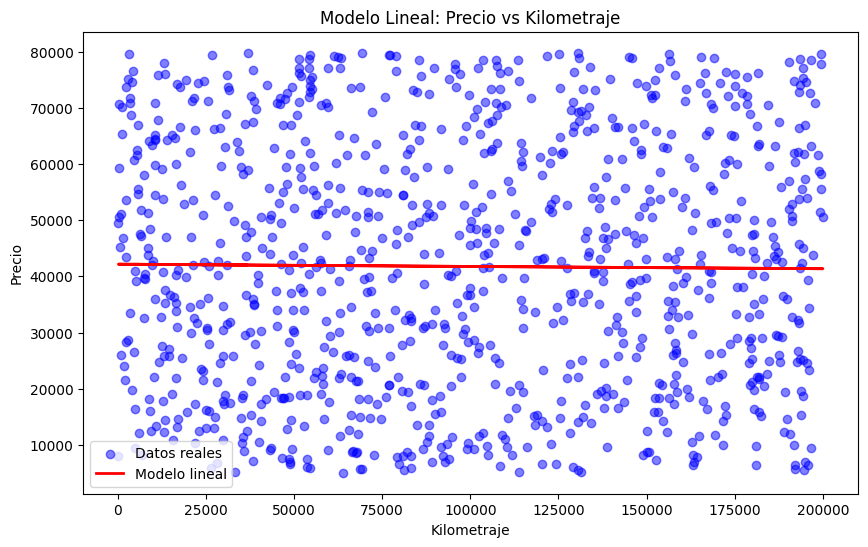

Matriz de correlación:
            Price   Mileage      Year
Price    1.000000 -0.004263 -0.005505
Mileage -0.004263  1.000000  0.011916
Year    -0.005505  0.011916  1.000000


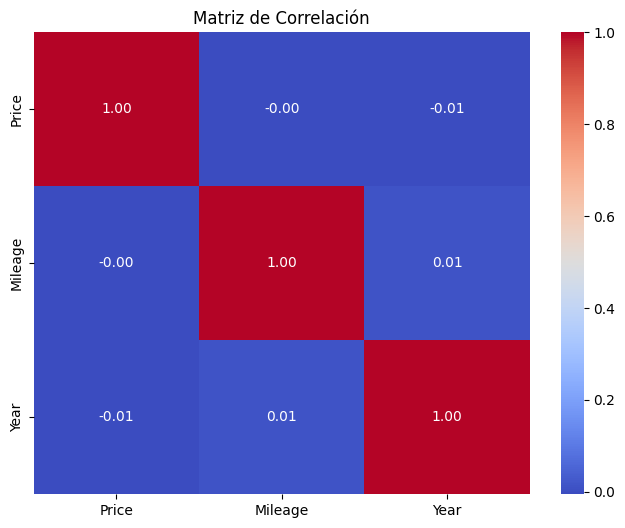

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionar las variables relevantes
# Utilizamos 'Mileage' como predictor y 'Price' como variable objetivo.
X = car_data[['Mileage']]  # Predictora
y = car_data['Price']      # Objetivo

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predicciones y evaluación
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

# 5. Visualización del modelo lineal
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Modelo lineal')
plt.title('Modelo Lineal: Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.legend()
plt.show()

# 6. Matriz de correlación y heatmap
correlation_matrix = car_data[['Price', 'Mileage', 'Year']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


6) Data classification
   Create a model using k nearest neighbor and test it.

Accuracy del modelo k-NN: 0.51

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       498
           1       0.51      0.52      0.52       502

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



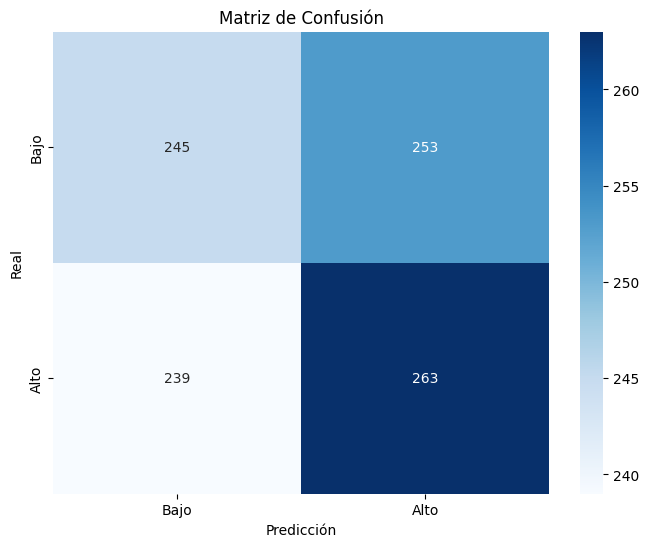

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparación de los datos para clasificación
# Vamos a crear una nueva columna de clasificación: Precio Alto (1) o Bajo (0), usando la mediana del precio como umbral
median_price = car_data['Price'].median()
car_data['High_Price'] = (car_data['Price'] > median_price).astype(int)

# Seleccionar características y etiqueta
X = car_data[['Mileage', 'Year']]  # Variables predictoras
y = car_data['High_Price']         # Etiqueta de clasificación

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crear y entrenar el modelo k-NN
k = 5  # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 3. Predicciones y evaluación
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo k-NN: {accuracy:.2f}")

# 4. Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bajo", "Alto"], yticklabels=["Bajo", "Alto"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


7) Data clustering
   Create a model using k means and test it.

Silhouette Score: 0.38


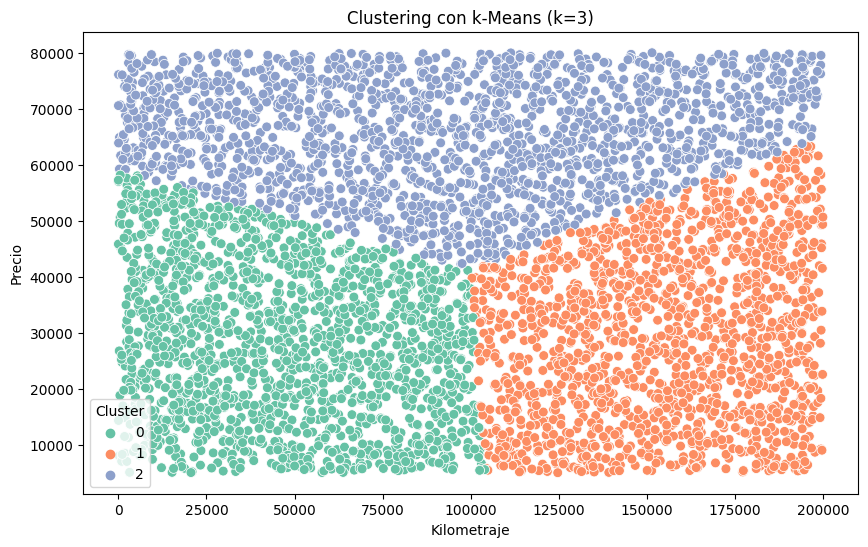

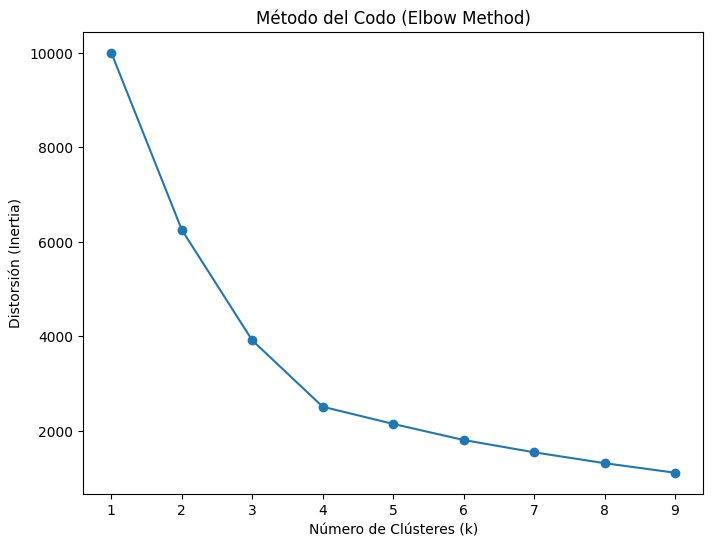

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionar características para clustering
# Usaremos 'Mileage' y 'Price' para el clustering
X = car_data[['Mileage', 'Price']]

# 2. Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Crear y entrenar el modelo k-Means
# Elegimos 3 clústeres inicialmente
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Predicciones de clústeres
car_data['Cluster'] = kmeans.labels_

# 4. Evaluación del modelo
# Calcular la puntuación de silueta para evaluar la calidad del clustering
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# 5. Visualización del clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=car_data['Mileage'], y=car_data['Price'], hue=car_data['Cluster'], palette='Set2', s=50)
plt.title("Clustering con k-Means (k=3)")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.legend(title="Cluster")
plt.show()

# 6. Gráfica para encontrar el valor óptimo de k (Elbow Method)
distortions = []
K = range(1, 10)  # Probar con k entre 1 y 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, marker='o')
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Distorsión (Inertia)")
plt.show()


8) Forecasting
   Create a model using linear regression and predict new data. Use a time series.

R² Score: -0.03
Mean Squared Error: 17865634.87


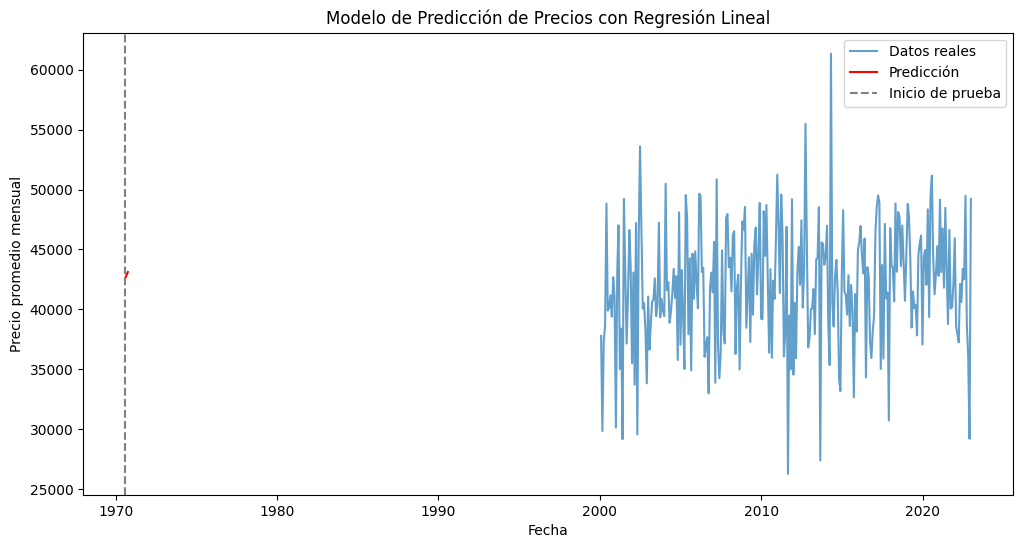


Predicciones futuras:
        Fecha  Precio_Pronosticado
0  2023-01-31         43128.800608
1  2023-02-28         43137.457457
2  2023-03-31         43146.114305
3  2023-04-30         43154.771154
4  2023-05-31         43163.428002
5  2023-06-30         43172.084851
6  2023-07-31         43180.741699
7  2023-08-31         43189.398548
8  2023-09-30         43198.055396
9  2023-10-31         43206.712244
10 2023-11-30         43215.369093
11 2023-12-31         43224.025941


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Preparación de los datos como una serie temporal
# Convertir la columna 'Manufacture_Date' a datetime y usarla como índice
car_data['Manufacture_Date'] = pd.to_datetime(car_data['Manufacture_Date'])
car_data = car_data.sort_values('Manufacture_Date')
car_data.set_index('Manufacture_Date', inplace=True)

# Resamplear datos mensualmente y calcular el precio promedio
monthly_data = car_data['Price'].resample('M').mean().dropna()

# Crear las variables X (tiempo) e y (precio)
monthly_data = monthly_data.reset_index()
monthly_data['Time_Index'] = np.arange(len(monthly_data))  # Índice temporal
X = monthly_data[['Time_Index']]
y = monthly_data['Price']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 3. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predicciones
y_pred = model.predict(X_test)

# 5. Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# 6. Visualización de resultados
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Manufacture_Date'], monthly_data['Price'], label='Datos reales', alpha=0.7)
plt.plot(X_test['Time_Index'], y_pred, label='Predicción', color='red')
plt.axvline(X_test['Time_Index'].iloc[0], color='gray', linestyle='--', label='Inicio de prueba')
plt.title("Modelo de Predicción de Precios con Regresión Lineal")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio mensual")
plt.legend()
plt.show()

# 7. Predicción de nuevos datos
# Predecir el próximo año (12 meses)
future_index = np.arange(len(monthly_data), len(monthly_data) + 12).reshape(-1, 1)
future_predictions = model.predict(future_index)

# Crear un DataFrame con las predicciones futuras
future_dates = pd.date_range(start=monthly_data['Manufacture_Date'].iloc[-1], periods=13, freq='M')[1:]
forecast = pd.DataFrame({'Fecha': future_dates, 'Precio_Pronosticado': future_predictions})

print("\nPredicciones futuras:")
print(forecast)


9) Text analysis
    Create a word cloud from text data.

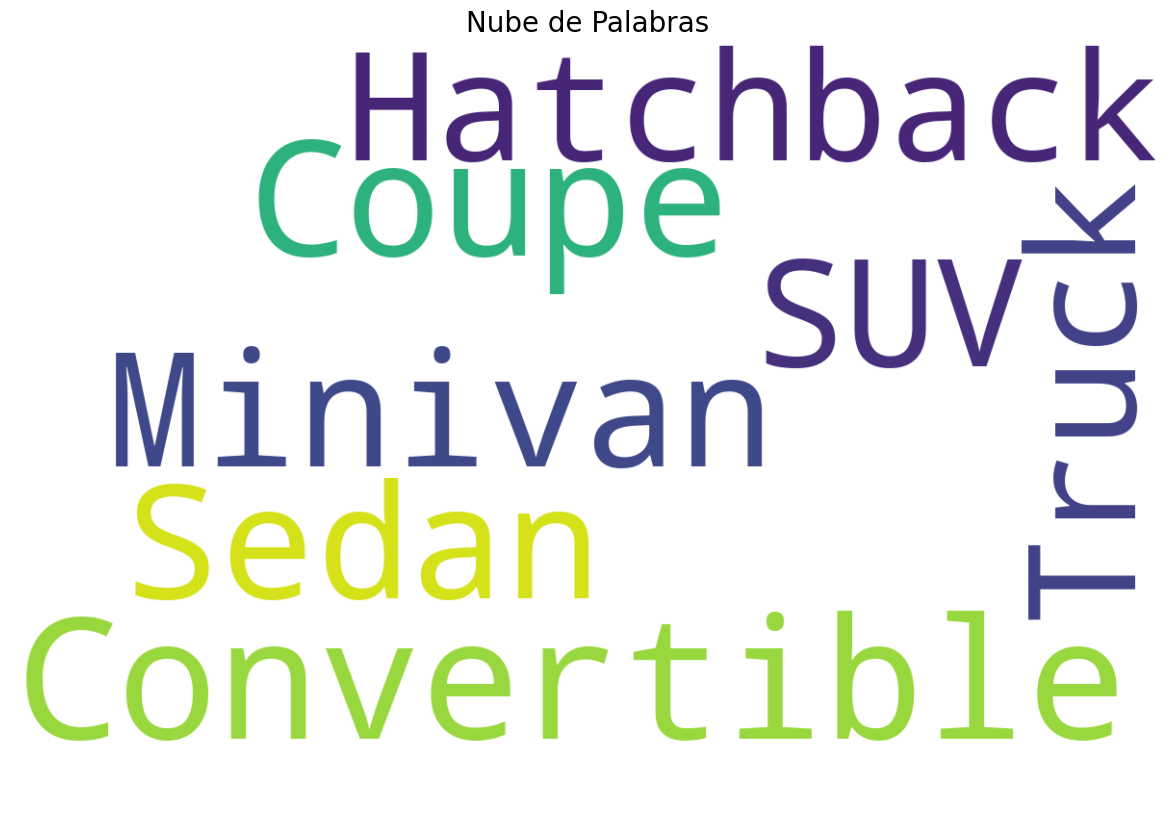

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Preparar el texto
# Combinar todos los textos en una sola cadena
if 'Model' in car_data.columns:
    text_data = " ".join(car_data['Model'].astype(str))
else:
    raise ValueError("No se encontró una columna de texto para analizar.")

# 2. Crear la nube de palabras más detallada
wordcloud = WordCloud(
    width=1200,           # Aumenta el ancho para abarcar más espacio
    height=800,           # Aumenta la altura para mayor detalle
    background_color='white',
    colormap='viridis',
    max_words=500,        # Incluye más palabras
    contour_color='steelblue',
    contour_width=1
).generate(text_data)

# 3. Visualizar la nube de palabras
plt.figure(figsize=(15, 10))  # Tamaño de la figura en Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras", fontsize=20)
plt.show()

